In [1]:
import toml
from NEW_cabm_agents import ConsumerModel
from joint_calendar import generate_joint_ad_promo_schedule
from ad_helpers import generate_brand_ad_channel_map

[0.7, 0.3]


/Users/michael/Documents/GitHub/consumer-abm/ad_calendar.py:77: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1733.33' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[week, channel] = round(


In [2]:
config = toml.load("config.toml")

In [3]:
# Set up household parameters
household_sizes = config["household"]["household_sizes"]
household_size_distribution = config["household"]["household_size_distribution"]
base_consumption_rate = config["household"]["base_consumption_rate"]
pantry_min_percent = config["household"]["pantry_min_percent"]

# Set up retail environment
brand_list = list(config["brands"].keys())
brand_market_share = [
    config["brands"][brand]["current_market_share"] for brand in brand_list
]
try:
    assert round(sum(brand_market_share), 2) == 1.0
except AssertionError:
    print("Error: Brand market shares do not sum to 1.")


# Set up advertising and promotion
ad_decay_factor = config["household"]["ad_decay_factor"]
joint_calendar = generate_joint_ad_promo_schedule(brand_list, config)
brand_channel_map = generate_brand_ad_channel_map(brand_list, config)
channel_set = set(
    channel for channels in brand_channel_map.values() for channel in channels
)
channel_priors = [
    config["household"]["base_channel_preferences"][channel] for channel in channel_set
]

/Users/michael/Documents/GitHub/consumer-abm/ad_calendar.py:77: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1733.33' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[week, channel] = round(


In [4]:
model = ConsumerModel(1)

In [5]:
for i in range(53):
    model.step()

ad_exposure method variables:  {'self': <NEW_cabm_agents.ConsumerAgent object at 0x10b3193d0>, 'weekly_adstock': {'A': 802.8201912956407, 'B': 0.0}, 'brands': ['A', 'B'], 'probabilities': [1.0, 0.0]}
ad_exposure method variables:  {'self': <NEW_cabm_agents.ConsumerAgent object at 0x10b3193d0>, 'weekly_adstock': {'A': 802.8201912956407, 'B': 0.0}, 'brands': ['A', 'B'], 'probabilities': [1.0, 0.0]}
ad_exposure method variables:  {'self': <NEW_cabm_agents.ConsumerAgent object at 0x10b3193d0>, 'weekly_adstock': {'A': 802.8201912956407, 'B': 0.0}, 'brands': ['A', 'B'], 'probabilities': [1.0, 0.0]}
ad_exposure method variables:  {'self': <NEW_cabm_agents.ConsumerAgent object at 0x10b3193d0>, 'weekly_adstock': {'A': 0.0, 'B': 0.0}, 'brands': ['A', 'B'], 'probabilities': [1.0, 0.0]}
ad_exposure method variables:  {'self': <NEW_cabm_agents.ConsumerAgent object at 0x10b3193d0>, 'weekly_adstock': {'A': 0.0, 'B': 0.0}, 'brands': ['A', 'B'], 'probabilities': [1.0, 0.0]}
ad_exposure method variables

In [6]:
model_df = model.datacollector.get_model_vars_dataframe()

In [7]:
model_df

,Total_Purchases,Average_Product_Price,Week_Number
0,"{'A': 0, 'B': 0}",5.00,1
1,"{'A': 35, 'B': 10}",2.50,2
2,"{'A': 73, 'B': 23}",2.50,3
3,"{'A': 70, 'B': 22}",2.50,4
4,"{'A': 76, 'B': 26}",3.75,5
...,...,...,...
105,"{'A': 75, 'B': 18}",2.50,2
106,"{'A': 73, 'B': 23}",2.50,3
107,"{'A': 67, 'B': 25}",2.50,4
108,"{'A': 75, 'B': 26}",3.75,5


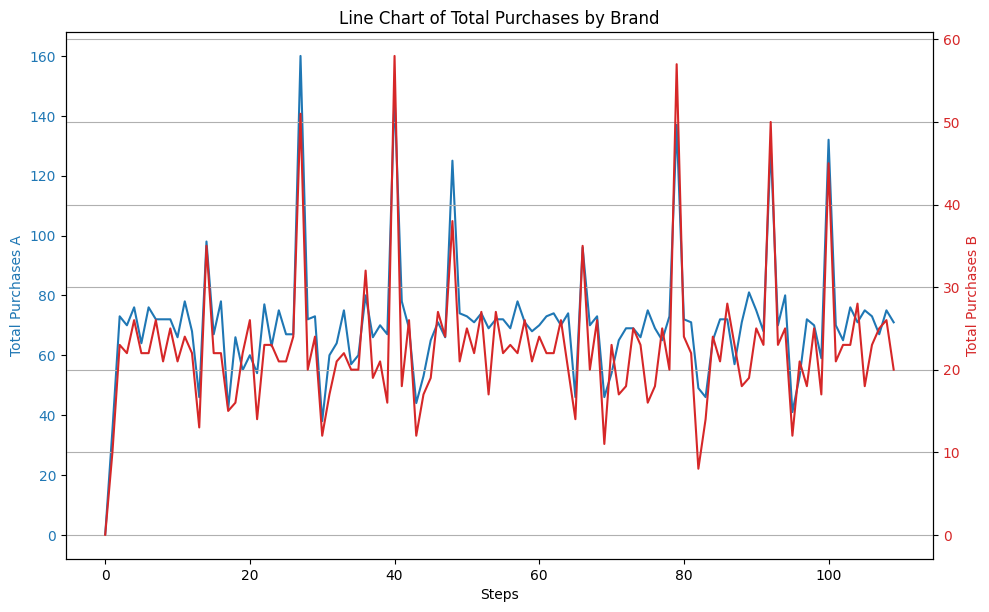

In [8]:
import matplotlib.pyplot as plt

# Extract purchases by brand
model_df['Total_Purchases_A'] = model_df['Total_Purchases'].apply(lambda x: x['A'])
model_df['Total_Purchases_B'] = model_df['Total_Purchases'].apply(lambda x: x['B'])

fig, ax1 = plt.subplots(figsize=(10,6))

# Plot total purchases for brand A
color = 'tab:blue'
ax1.set_xlabel('Steps')
ax1.set_ylabel('Total Purchases A', color=color)
ax1.plot(model_df['Total_Purchases_A'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Plot total purchases for brand B
color = 'tab:red'
ax2.set_ylabel('Total Purchases B', color=color)
ax2.plot(model_df['Total_Purchases_B'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Line Chart of Total Purchases by Brand')
plt.grid(True)
plt.show()

In [9]:
agent_summary_df = model.datacollector.get_agent_vars_dataframe()

In [10]:
agent_summary_df

Household_Size Purchased_This_Step  Pantry_Stock  Pantry_Max  \
Step AgentID                                                                 
0    0                     2    {'A': 0, 'B': 0}      2.000000           2   
     1                     4    {'A': 0, 'B': 0}      5.000000           5   
     2                     7    {'A': 0, 'B': 0}      8.000000           8   
     3                     1    {'A': 0, 'B': 0}      2.000000           2   
     4                     3    {'A': 0, 'B': 0}      1.000000           1   
...                      ...                 ...           ...         ...   
109  95                    3    {'A': 1, 'B': 0}      4.276732           5   
     96                    1    {'A': 0, 'B': 0}      0.495674           1   
     97                    1    {'A': 4, 'B': 0}      3.932066           4   
     98                    1    {'A': 0, 'B': 1}      0.660804           1   
     99                    5    {'A': 0, 'B': 2}      5.840440           6   

              Pantry_Min Purchase_Behavior  Minimum_Purchase_Needed  \
Step AgentID                                                          
0    0               0.2       buy_minimum                        0   
     1               0.4       buy_minimum                        0   
     2               0.7       buy_minimum                        0   
     3               0.1       buy_minimum                        0   
     4               0.3       buy_minimum                        0   
...                  ...               ...                      ...   
109  95              0.3       buy_maximum                        0   
     96              0.1       buy_maximum                        0   
     97              0.1       buy_maximum                        1   
     98              0.1       buy_maximum                        1   
     99              0.5       buy_maximum                        0   

              Current_Product_Price  Last_Product_Price Brand_Preference  
Step AgentID                                                              
0    0                         5.00                 5.0                A  
     1                         5.00                 5.0                A  
     2                         5.00                 5.0                A  
     3                         5.00                 5.0                A  
     4                         5.00                 5.0                A  
...                             ...                 ...              ...  
109  95                        3.75                 5.0                A  
     96                        3.75                 5.0                B  
     97                        3.75                 5.0                A  
     98                        3.75                 5.0                B  
     99                        3.75                 5.0                B  

[11000 rows x 10 columns]

In [11]:
import matplotlib.pyplot as plt

def plot_purchases(agent_summary_df, AgentID):
    # Filter dataframe for the given AgentID
    agent_df = agent_summary_df.xs(AgentID, level='AgentID')

    # Extract purchases by brand
    agent_df['Purchased_This_Step_A'] = agent_df['Purchased_This_Step'].apply(lambda x: x['A'])
    agent_df['Purchased_This_Step_B'] = agent_df['Purchased_This_Step'].apply(lambda x: x['B'])

    fig, ax1 = plt.subplots(figsize=(10,6))

    # Plot purchases for brand A
    color = 'tab:blue'
    ax1.set_xlabel('Steps')
    ax1.set_ylabel('Purchases A', color=color)
    ax1.plot(agent_df['Purchased_This_Step_A'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    # Plot purchases for brand B
    color = 'tab:red'
    ax2.set_ylabel('Purchases B', color=color)
    ax2.plot(agent_df['Purchased_This_Step_B'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'Line Chart of Purchases by Agent {AgentID}')
    plt.grid(True)
    plt.show()

/var/folders/vf/m4p5jj9s07x4v_df3mgg2fv40000gn/T/ipykernel_9796/1843756818.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_df['Purchased_This_Step_A'] = agent_df['Purchased_This_Step'].apply(lambda x: x['A'])
/var/folders/vf/m4p5jj9s07x4v_df3mgg2fv40000gn/T/ipykernel_9796/1843756818.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_df['Purchased_This_Step_B'] = agent_df['Purchased_This_Step'].apply(lambda x: x['B'])


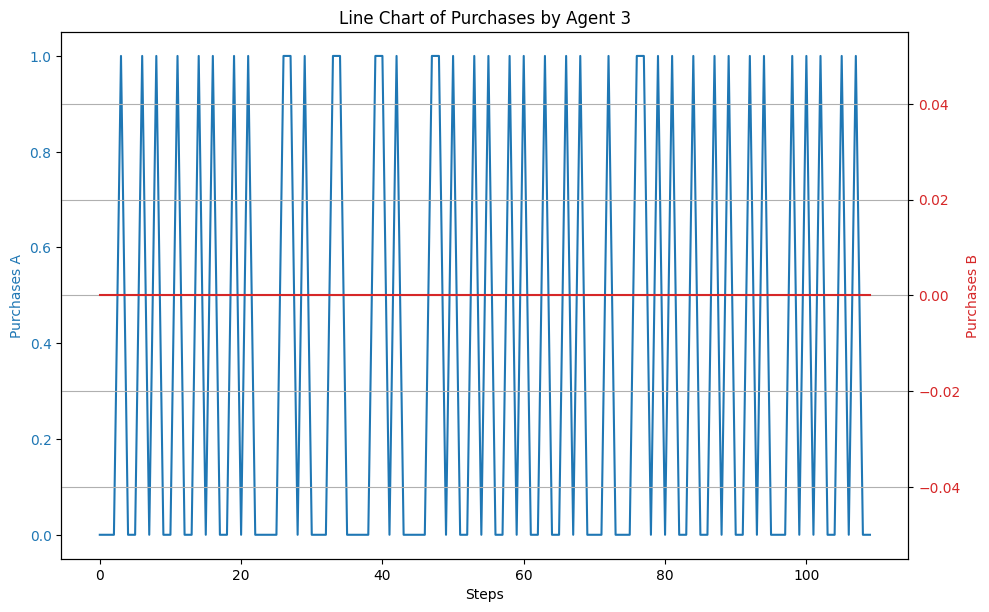

In [14]:
plot_purchases(agent_summary_df,3)

In [15]:
def check_multiple_purchases(df):
    # Define a function to check if more than one value in the dictionary is greater than 0
    def more_than_one_purchase(purchases):
        return sum(value > 0 for value in purchases.values()) > 1

    # Apply the function to the 'Purchased_This_Step' column
    multiple_purchases = df['Purchased_This_Step'].apply(more_than_one_purchase)

    # Return True if there are any cases of multiple purchases, False otherwise
    return any(multiple_purchases)

# Usage:
print(check_multiple_purchases(agent_summary_df))

False


In [39]:
def count_letter_changes(series):
    # Compute the difference between consecutive letters
    letter_changes = series != series.shift()

    # Ignore the first value
    letter_changes = letter_changes.iloc[1:]

    # Sum the letter_changes series to get the number of letter changes
    change_count = letter_changes.sum()

    return change_count

In [40]:
count_letter_changes(agent_summary_df.xs(8, level='AgentID')['Brand_Preference'])

0

In [44]:
agent_summary_df.index

MultiIndex([(0, 0),
            (0, 1),
            (0, 2),
            (0, 3)],
           names=['Step', 'AgentID'])

In [38]:
agent_summary_df.xs(8, level='AgentID')['Brand_Preference'].values

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A'], dtype=object)

In [45]:
# Get all unique AgentIDs
unique_agent_ids = agent_summary_df.index.get_level_values('AgentID').unique()

# Loop over all AgentIDs and apply function
results = []
for agent_id in unique_agent_ids:
    agent_brand_pref = agent_summary_df.xs(agent_id, level='AgentID')['Brand_Preference']
    result = count_letter_changes(agent_brand_pref)
    results.append((agent_id, result))
    

In [50]:
for i in unique_agent_ids:
    print(agent_summary_df.xs(agent_id, level='AgentID')['Brand_Preference'].values)

['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B']
['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B']
['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B